In [1]:
using Pkg
Pkg.activate("/home/julisn/Codes/LadderDGA.jl/")
using LadderDGA
using Plots, LaTeXStrings

  Activating project at `~/Codes/LadderDGA.jl`


In [2]:
# Fd -> +U
# Fm -> -U

In [3]:
sampling = LadderDGA.Dispersions.gen_sampling(LadderDGA.Dispersions.cPnn, 2, 8)
kGrid_f = map(v -> LadderDGA.Dispersions.basis_transform(LadderDGA.Dispersions.cP,  v), sampling)
show(stdout, "text/plain", kGrid_f)

k0 = findfirst(k -> all(k .≈ 0), kGrid_f)
println("\nk0 = $k0, isnothing = ", isnothing(k0))

8×8 Matrix{Tuple{Float64, Float64}}:
 (-2.35619, -2.35619)   (-2.35619, -1.5708)   (-2.35619, -0.785398)   (-2.35619, 0.0)   (-2.35619, 0.785398)   (-2.35619, 1.5708)   (-2.35619, 2.35619)   (-2.35619, 3.14159)
 (-1.5708, -2.35619)    (-1.5708, -1.5708)    (-1.5708, -0.785398)    (-1.5708, 0.0)    (-1.5708, 0.785398)    (-1.5708, 1.5708)    (-1.5708, 2.35619)    (-1.5708, 3.14159)
 (-0.785398, -2.35619)  (-0.785398, -1.5708)  (-0.785398, -0.785398)  (-0.785398, 0.0)  (-0.785398, 0.785398)  (-0.785398, 1.5708)  (-0.785398, 2.35619)  (-0.785398, 3.14159)
 (0.0, -2.35619)        (0.0, -1.5708)        (0.0, -0.785398)        (0.0, 0.0)        (0.0, 0.785398)        (0.0, 1.5708)        (0.0, 2.35619)        (0.0, 3.14159)
 (0.785398, -2.35619)   (0.785398, -1.5708)   (0.785398, -0.785398)   (0.785398, 0.0)   (0.785398, 0.785398)   (0.785398, 1.5708)   (0.785398, 2.35619)   (0.785398, 3.14159)
 (1.5708, -2.35619)     (1.5708, -1.5708)     (1.5708, -0.785398)     (1.5708, 0.0)     (1.5708, 0

In [45]:
#cfg = "/home/julisn/Codes/lDGA_pp_test/tp0_50_s1_U2.0_b5.0_mu1.0/config.toml"
#cfg = "/home/julisn/Codes/lDGA_pp_test/test_2/config.toml"
#cfg = "/home/julisn/Codes/lDGA_pp_test/tp1_50_s0_U2.0_b5.0_mu1.0/config.toml"
cfg = "/home/julisn/Codes/lDGA_pp_test/tp1_50_s1_U2.0_b5.0_mu1.0/config.toml"

wp, mP, sP, env, kGridsStr = readConfig(cfg)
lDGAhelper = setup_LDGA(kGridsStr[1], mP, sP, env)
lDGAhelper_Ur = deepcopy(lDGAhelper)
lDGAhelper_Ur.Γ_m[:,:,:] = lDGAhelper_Ur.Γ_m[:,:,:] .- (-lDGAhelper_Ur.mP.U / lDGAhelper_Ur.mP.β^2)
lDGAhelper_Ur.Γ_d[:,:,:] = lDGAhelper_Ur.Γ_d[:,:,:] .- ( lDGAhelper_Ur.mP.U / lDGAhelper_Ur.mP.β^2)

bubble     = calc_bubble(:DMFT, lDGAhelper);
bubble_pp  = calc_bubble(:DMFT, lDGAhelper; mode=:pp);

[ Info: Reading Inputs...
[ Info: Setting up calculation for kGrid 2Dsc-0.25-0.2-0.1 of size 2
WARNING!!! k-grid sampling must contain zero-vector in order for convolutions to work!
DBG: NOT using diagonal terms in λ₀
┌ Info: Inputs Read. Starting Computation.
│ Local susceptibilities with ranges are:
│ χLoc_m(1:101) = 0.4074, χLoc_d(1:101) = 0.0926
└ sum χupup check (plain ?≈? tail sub ?≈? imp_dens ?≈? n/2 (1-n/2)): 0.24838674915875686 ?=? 0.25000344825755627 ?≈? 0.25000344825755627 ≟ 0.24999268986197437"


In [46]:
χm, γm = calc_χγ(:m, lDGAhelper, bubble);
χd, γd = calc_χγ(:d, lDGAhelper, bubble);
#λ₀ = calc_λ0(bubble, lDGAhelper)
#Σ_ladder = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper);

[ Info: m channel: |∑χ(q=0,ω≠0)| = 0.12180408872 ≟ 0
[ Info: d channel: |∑χ(q=0,ω≠0)| = 0.237050026898 ≟ 0


In [47]:
#χm_star, γm_star = calc_χγ(:m, lDGAhelper_Ur, bubble)
#χd_star, γd_star = calc_χγ(:d, lDGAhelper_Ur, bubble);

# Matrix identity for difference between chi and chi^star


Let A and (A+B) be invertible matrices and rank(B) = 1. Then (see lDGA numerics):

$(A+B)^{-1} = A^{-1} - \frac{1}{1+g} A^{-1} B A^{-1}$ and $g = Tr(B A^{1}) \neq 1$



In [48]:
using LinearAlgebra
@time χm_gen      = calc_gen_χ(lDGAhelper.Γ_m,    bubble, lDGAhelper.kG);
@time χm_star_gen = calc_gen_χ(lDGAhelper_Ur.Γ_m, bubble, lDGAhelper_Ur.kG);
@time χd_star_gen = calc_gen_χ(lDGAhelper_Ur.Γ_d, bubble, lDGAhelper_Ur.kG);

  0.261680 seconds (4.86 k allocations: 262.524 MiB, 9.45% gc time)
  0.159749 seconds (4.86 k allocations: 262.524 MiB, 1.49% gc time)
  0.144078 seconds (4.86 k allocations: 262.524 MiB, 1.63% gc time)


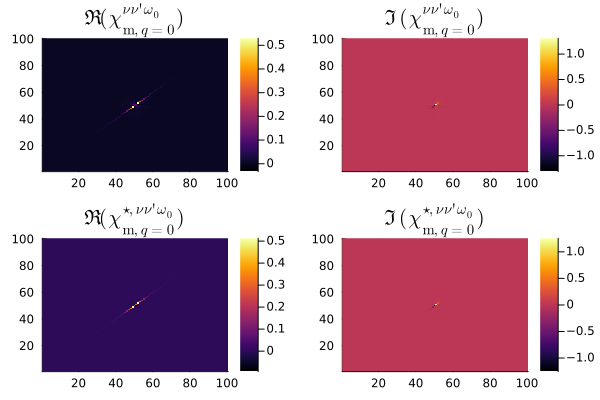

In [49]:
p1 = heatmap(real.(χm_gen[:,:,1,51]), 
    title=L"\Re(\chi^{\nu\nu'\omega_0}_{\mathrm{m},q=0})")
p2 = heatmap(imag.(χm_gen[:,:,1,51]), 
    title=L"\Im(\chi^{\nu\nu'\omega_0}_{\mathrm{m},q=0})")
p3 = heatmap(real.(χm_star_gen[:,:,1,51]), 
    title=L"\Re(\chi^{\star,\nu\nu'\omega_0}_{\mathrm{m},q=0})")
p4 = heatmap(imag.(χm_star_gen[:,:,1,51]), 
    title=L"\Im(\chi^{\star,\nu\nu'\omega_0}_{\mathrm{m},q=0})")

plot(p1, p2, p3, p4)

# Calculation of F_r

??????

$ \gamma^{\nu\omega}_{m/d,q} = \beta (\chi^{\nu\nu'\omega}_{0,\mathbf{q}})^{-1}\sum \chi^{\star,\nu\nu'\omega}_{m/d,q} \pm 1 $ 


$ F^{\nu\nu'\omega}_{r,\mathbf{q}} = \beta^2 (\chi^{\nu\nu'\omega}_{0,\mathbf{q}})^{-1} 
            -  \beta^2 (\chi^{\nu\omega}_0)^{-1} \chi^{*,\nu\nu'\omega}_{r,\mathbf{q}} (\chi^{\nu'\omega}_0)^{-1} 
        + U_r (1 - U_r \chi^{\omega}_r) (\chi^{\nu\omega}_{0,\mathbf{q}})^{-1} \sum_{\nu_1\nu_2}\chi^{*,\nu\nu_1\omega}_{r,\mathbf{q}} \chi^{*,\nu_2\nu'\omega}_{r,\mathbf{q}} (\chi^{\nu'\omega}_{0,\mathbf{q}})^{-1} $

### pm 1 missing?? 
$ F^{\nu\nu'\omega}_{r,\mathbf{q}} = 
            \beta^2 (\chi^{\nu\nu'\omega}_{0,\mathbf{q}})^{-1}
            -  \beta^2 (\chi^{\nu\omega}_{0,\mathbf{q}})^{-1} \chi^{*,\nu\nu'\omega}_{r,\mathbf{q}} (\chi^{\nu'\omega}_{0,\mathbf{q}})^{-1} 
        + U_r (1 - U_r \chi^{\omega}_r) (\gamma^{\nu\omega}_r \mp 1) (\gamma^{\nu'\omega}_r \mp 1) $
        
$ F^{\nu\nu'\omega}_{r,\mathbf{q}} =
        \beta^2 \left( \chi^{\nu\nu'\omega}_{0,\mathbf{q}} \right)^{-1} 
        +  \beta^2 \left( \chi^{\nu\omega}_{0,\mathbf{q}} \right)^{-1}  \chi^{\nu\nu'\omega}_{r,\mathbf{q}} \left( \chi^{\nu'\omega}_{0,\mathbf{q}} \right)^{-1} $

In [99]:
function core(χ₀::χ₀T)
    view(χ₀.data, :,χ₀.ν_shell_size+1:size(χ₀.data,2)-χ₀.ν_shell_size,:)
end

function F_from_χ_star_gen(χ₀::χ₀T, χstar_r::Array{ComplexF64,4}, χr::χT, γr::γT, Ur::Float64)
    F = similar(χstar_r)
    for ωi in axes(χstar_r,4)
        for qi in axes(χstar_r,3)
            pre_factor = Ur * (1 - Ur * χr[qi,ωi])
            for νpi in axes(χstar_r,2)
                @simd for νi in axes(χstar_r,1)
                    @inbounds F[νi,νpi,qi,ωi]  = -χ₀.β^2 * χstar_r[νi,νpi,qi,ωi] / (core(χ₀)[qi,νi,ωi] * core(χ₀)[qi,νpi,ωi])
                    @inbounds F[νi,νpi,qi,ωi] +=  pre_factor * γr[qi,νi,ωi] * γr[qi,νpi,ωi]
                end
                F[νpi,νpi,qi,ωi] += χ₀.β^2 / core(χ₀)[qi,νpi,ωi]
            end
        end
    end
    return F
end

function F_r_test(χ₀::χ₀T, χr)
    F = -deepcopy(χr)
    for ωi in 1:size(χm_gen,4)
        for qi in 1:size(χm_gen,3)
            for νpi in 1:size(χm_gen,2)
                for νi in 1:size(χm_gen,1)
                    F[νi,νpi,qi,ωi] = χ₀.β^2 .* F[νi,νpi,qi,ωi]/(core(χ₀)[qi,νi,ωi] * core(χ₀)[qi,νpi,ωi])
                end
                F[νpi,νpi,qi,ωi] += χ₀.β^2 / core(χ₀)[qi,νpi,ωi]
            end
        end
    end
    return F
end

function F_from_χ_star_gen_test(χ₀::χ₀T, χstar_r::Array{ComplexF64,4}, χr::χT, γr::γT, Ur::Float64)
    F = similar(χstar_r)
    for ωi in 1:size(χstar_r,4)
        for qi in 1:size(χstar_r,3)
            F[:,:,qi,ωi] = Diagonal(χ₀.β^2 ./ core(χ₀)[qi,:,ωi]) .- χ₀.β^2 .* χstar_r[:,:,qi,ωi] ./ (core(χ₀)[qi,:,ωi] .* transpose(core(χ₀)[qi,:,ωi]))
            F[:,:,qi,ωi] +=  Ur * (1 - Ur * χr[qi,ωi]) .* ((γr[qi,:,ωi]) .* transpose(γr[qi,:,ωi]))
        end
    end
    return F
end

F_from_χ_star_gen (generic function with 1 method)

In [100]:
@time F_m_test1 = F_r_test(bubble, χm_gen);

  2.809211 seconds (30.54 M allocations: 978.940 MiB, 2.65% gc time, 4.77% compilation time)


In [105]:
@time F_m_test2 = F_from_χ_star_gen(bubble, χm_star_gen, χm, γm, -lDGAhelper.mP.U);
@time F_d_test2 = F_from_χ_star_gen(bubble, χd_star_gen, χd, γd, lDGAhelper.mP.U);

  0.079931 seconds (5 allocations: 46.234 MiB)
  0.076811 seconds (4 allocations: 46.234 MiB)


In [102]:
@time F_m_test3 = F_from_χ_star_gen_test(bubble, χm_star_gen, χm, γm, -lDGAhelper.mP.U);

  0.122935 seconds (5.46 k allocations: 280.637 MiB)


In [84]:
test1 = sum(abs.(F_m_test1 .- F_m_test2)) / sum(abs.(F_m_test1))
tt = findmax(abs.(F_m_test1 .- F_m_test2))
test2 = sum(abs.(F_m_test2 .- F_m_test3))
println("$test1, $test2 /// max diff : " , tt) 

0.010273882552124075, 7.447909527325243e-9 /// max diff : (0.0425429725303742, CartesianIndex(50, 50, 1, 52))


lim: -1.9952906472832146 ?=? -2.0


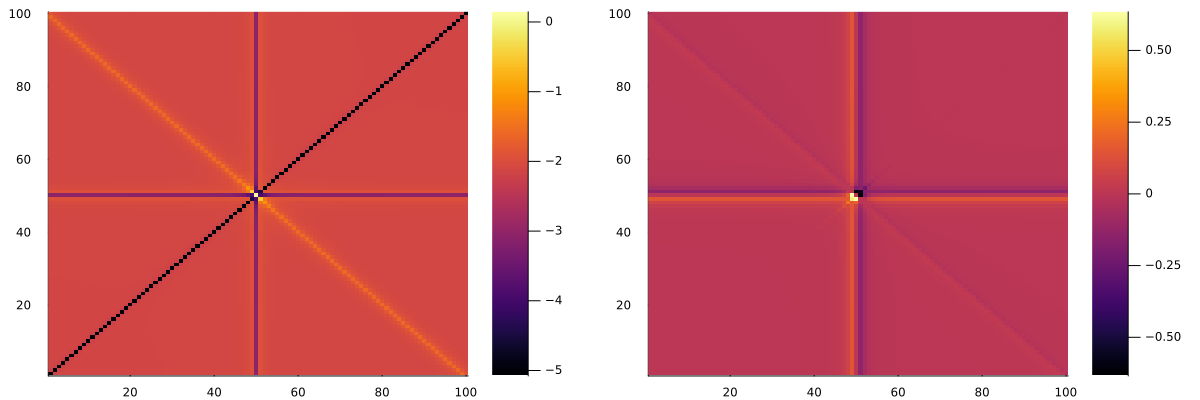

In [55]:
ωi = 52
qi = 1
p1 = heatmap(real(F_m_test1[:,:,qi,ωi]), titel="Re Test1")
p2 = heatmap(imag(F_m_test1[:,:,qi,ωi]), titel="Im Test1")
println("lim: ", real(F_m_test1[1,15,qi,1]), " ?=? ", -lDGAhelper.mP.U)
plot(p1, p2, size=(1200,400))

lim: -1.9952906472832146 ?=? -2.0


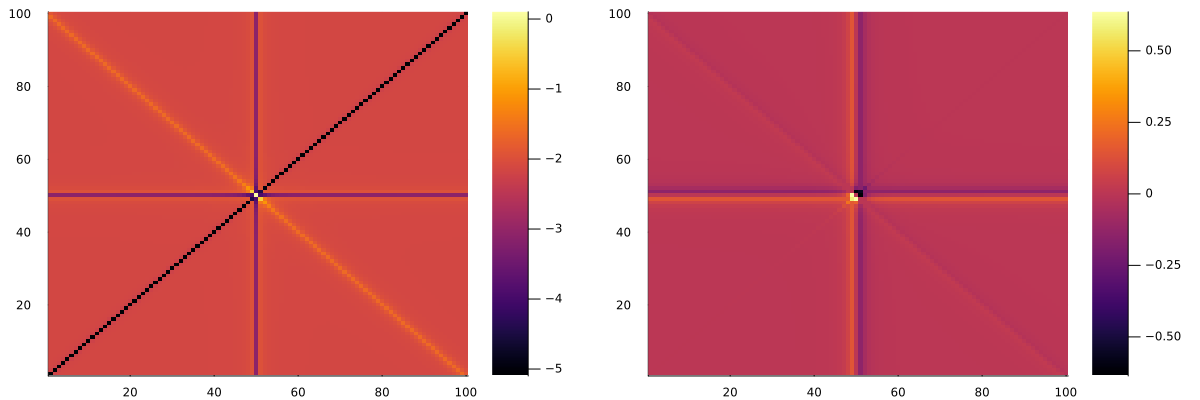

In [56]:
p1 = heatmap(real(F_m_test2[:,:,qi,ωi]), titel="Re Test4")
p2 = heatmap(imag(F_m_test2[:,:,qi,ωi]), titel="Im Test4")
println("lim: ", real(F_m_test1[1,15,qi,1]), " ?=? ", -lDGAhelper.mP.U)
plot(p1, p2, size=(1200,400))

lim: -1.9952906472832146 ?=? -2.0


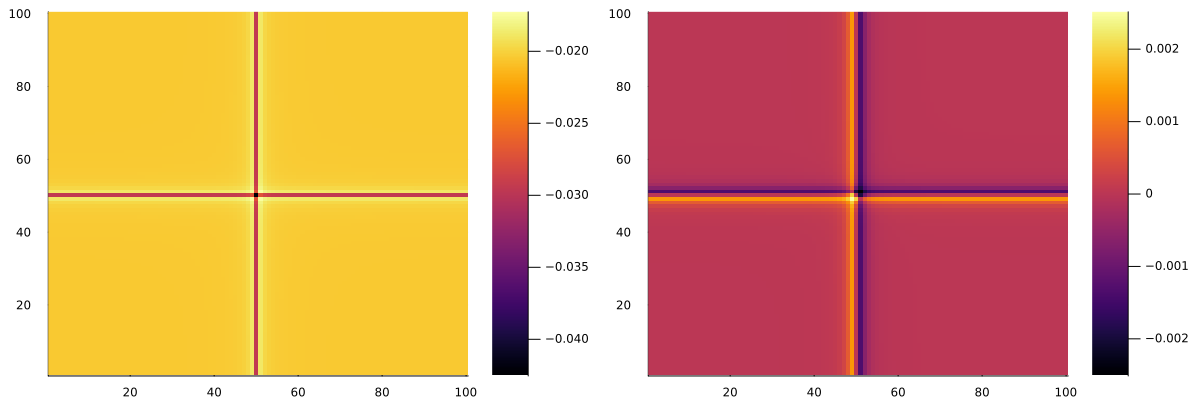

In [57]:
p1 = heatmap(real(F_m_test2 .- F_m_test1)[:,:,qi,ωi], titel="Re Test4")
p2 = heatmap(imag(F_m_test2 .- F_m_test1)[:,:,qi,ωi], titel="Im Test4")
println("lim: ", real(F_m_test1[1,15,qi,1]), " ?=? ", -lDGAhelper.mP.U)
plot(p1, p2, size=(1200,400))

lim: -2.1528636615393415


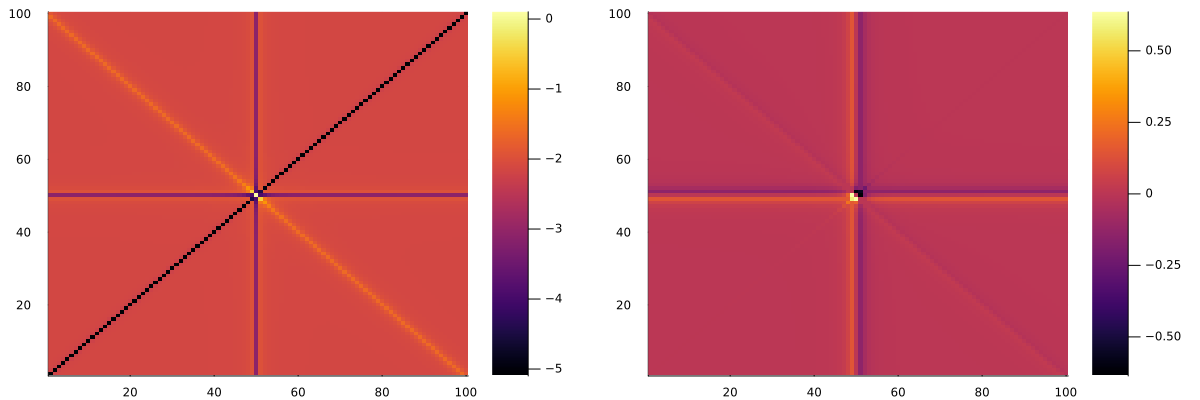

In [58]:
p1 = heatmap(real(F_m_test3[:,:,qi,ωi]), titel="Re Test3")
p2 = heatmap(imag(F_m_test3[:,:,qi,ωi]), titel="Im Test3")
println("lim: ", real(F_m_test3[1,12,qi,ωi]))
plot(p1, p2, size=(1200,400))

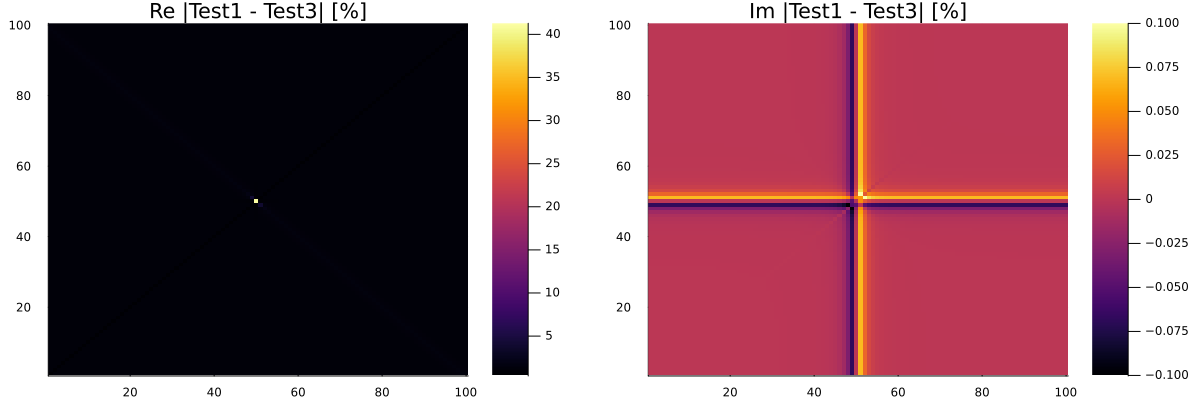

In [59]:
p1 = heatmap(100 .* real(((F_m_test1 .- F_m_test3)./abs.(F_m_test3))[:,:,qi,ωi]), title="Re |Test1 - Test3| [%]")
p2 = heatmap(100 .* imag(((F_m_test1 .- F_m_test3)./abs.(F_m_test3))[:,:,qi,ωi]), title="Im |Test1 - Test3| [%]")
plot(p1, p2, size=(1200,400))

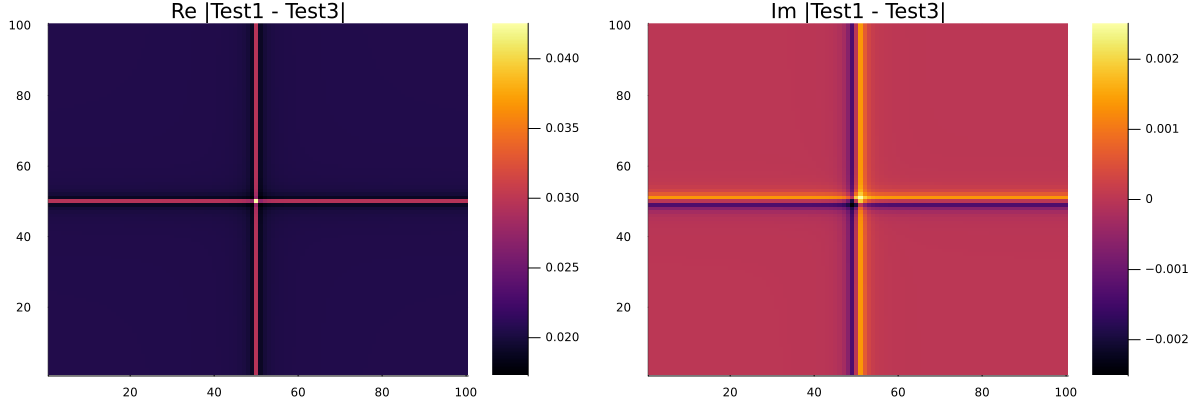

In [60]:
p1 = heatmap(real(((F_m_test1 .- F_m_test3))[:,:,qi,ωi]), title="Re |Test1 - Test3|")
p2 = heatmap(imag(((F_m_test1 .- F_m_test3))[:,:,qi,ωi]), title="Im |Test1 - Test3|")
plot(p1, p2, size=(1200,400))

In [61]:
F_m_loc = F_from_χ(lDGAhelper.χDMFT_m, lDGAhelper.gImp[1, :], lDGAhelper.sP, lDGAhelper.mP.β);
F_d_loc = F_from_χ(lDGAhelper.χDMFT_d, lDGAhelper.gImp[1, :], lDGAhelper.sP, lDGAhelper.mP.β);

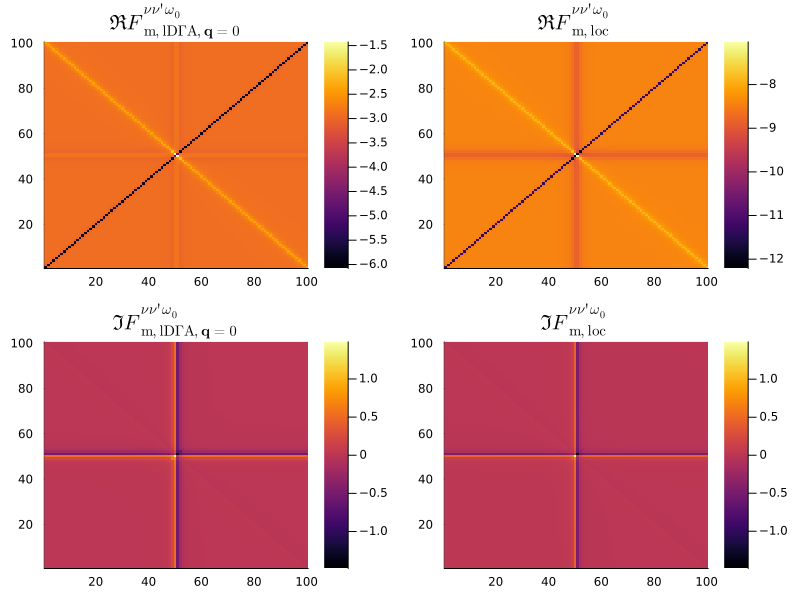

In [62]:
ωi = 51

ωn = (-lDGAhelper.sP.n_iω:lDGAhelper.sP.n_iω)[ωi]
p1 = heatmap(real(F_m_test2[:,:,1,ωi]), title=L"\Re F^{\nu\nu'\omega_{%$ωn}}_{\mathrm{m},\mathrm{lD}\Gamma\mathrm{A},\mathbf{q}=0}")
p2 = heatmap(real(F_m_loc[:,:,ωi]), title=L"\Re F^{\nu\nu'\omega_{%$ωn}}_{\mathrm{m},\mathrm{loc}}")
p3 = heatmap(imag(F_m_test2[:,:,1,ωi]), title=L"\Im F^{\nu\nu'\omega_{%$ωn}}_{\mathrm{m},\mathrm{lD}\Gamma\mathrm{A},\mathbf{q}=0}")
p4 = heatmap(imag(F_m_loc[:,:,ωi]), title=L"\Im F^{\nu\nu'\omega_{%$ωn}}_{\mathrm{m},\mathrm{loc}}")
plot(p1, p2, p3, p4, size=(800,600))

## F_r asympt checks

In [63]:
U = lDGAhelper.mP.U
β = lDGAhelper.mP.β
qi = 4
ω0 = lDGAhelper.sP.n_iω+1


χ_d_asympt = lDGAhelper.sP.χ_helper.χch_asympt
χ_m_asympt = lDGAhelper.sP.χ_helper.χsp_asympt
χ_pp_asympt = lDGAhelper.sP.χ_helper.χpp_asympt

Γd_lim_diag =  U + U^2/2 * χ_d_asympt[1] + 1.5 * U^2 * χ_m_asympt[1] 
Γm_lim_diag = -U + U^2/2 * χ_d_asympt[1] - 0.5 * U^2 * χ_m_asympt[1]
Γs_lim_diag = 2U - U^2/2 * χ_d_asympt[1] + 1.5 * U^2 * χ_m_asympt[1]
Γt_lim_diag =    + U^2/2 * χ_d_asympt[1] + 0.5 * U^2 * χ_m_asympt[1];

Γd_lim_bg =  U
Γm_lim_bg = -U
Γs_lim_bg = 2U
Γt_lim_bg = 0.0;


Fd_lim_diag =  U + U^2/2 * χ_d_asympt[1] + 1.5 * U^2 * χ_m_asympt[1] - 1 * U^2 * χ_d_asympt[1]
Fm_lim_diag = -U + U^2/2 * χ_d_asympt[1] - 0.5 * U^2 * χ_m_asympt[1] - 1 * U^2 * χ_m_asympt[1]
Fs_lim_diag = 2U - U^2/2 * χ_d_asympt[1] + 1.5 * U^2 * χ_m_asympt[1] - 2 * U^2 * χ_pp_asympt[1]
Ft_lim_diag =      U^2/2 * χ_d_asympt[1] + 0.5 * U^2 * χ_m_asympt[1] ;

Fd_lim_bg =  U - 1 * U^2 * χ_d_asympt[1]
Fm_lim_bg = -U - 1 * U^2 * χ_m_asympt[1]
Fs_lim_bg = 2U - 2 * U^2 * χ_pp_asympt[1]
Ft_lim_bg = 0.0;

Fd_lim_bg_nl =  U - 1 * U^2 * χd[qi,ω0]
Fm_lim_bg_nl = -U - 1 * U^2 * χm[qi,ω0]
Fs_lim_bg_nl = 2U - 2 * U^2 * χ_pp_asympt[1]
Ft_lim_bg_nl = 0.0;

Fd_bg_diff = Fd_lim_bg_nl - Fd_lim_bg 
Fm_bg_diff = Fm_lim_bg_nl - Fm_lim_bg 
Fs_bg_diff = Fs_lim_bg_nl - Fs_lim_bg 
Ft_bg_diff = Ft_lim_bg_nl - Ft_lim_bg

Fd_lim_diag_nl = Fd_lim_diag + Fd_bg_diff # U + U^2/2 * χd[qi,ω0] + 1.5 * U^2 * χm[qi,ω0] - 1 * U^2 * χd[qi,ω0]      - Fd_bg_diff
Fm_lim_diag_nl = Fm_lim_diag + Fm_bg_diff #-U + U^2/2 * χd[qi,ω0] - 0.5 * U^2 * χm[qi,ω0] - 1 * U^2 * χm[qi,ω0]      - Fm_bg_diff
Fs_lim_diag_nl = Fs_lim_diag + Fs_bg_diff #2U - U^2/2 * χd[qi,ω0] + 1.5 * U^2 * χm[qi,ω0] - 2 * U^2 * χ_pp_asympt[1] - Fs_bg_diff
Ft_lim_diag_nl = Ft_lim_diag + Ft_bg_diff #     U^2/2 * χd[qi,ω0] + 0.5 * U^2 * χm[qi,ω0] - Ft_bg_diff;

Fd_lim_bg_nl_int = kintegrate(lDGAhelper.kG,  U .- 1 .* U^2 .* χd[:,ω0],1)[1]
Fm_lim_bg_nl_int = kintegrate(lDGAhelper.kG, -U .- 1 .* U^2 .* χm[:,ω0],1)[1]
Fs_lim_bg_nl_int = 2U - 2 * U^2 * χ_pp_asympt[1]
Ft_lim_bg_nl_int = 0.0;

Fd_bg_int_diff = Fd_lim_bg_nl_int - Fd_lim_bg
Fm_bg_int_diff = Fm_lim_bg_nl_int - Fm_lim_bg
Fs_bg_int_diff = Fs_lim_bg_nl_int - Fs_lim_bg
Ft_bg_int_diff = Ft_lim_bg_nl_int - Ft_lim_bg

Fd_lim_diag_nl_int = Fd_lim_diag+ Fd_bg_int_diff
Fm_lim_diag_nl_int = Fm_lim_diag + Fm_bg_int_diff
Fs_lim_diag_nl_int = Fs_lim_diag + Fs_bg_int_diff
Ft_lim_diag_nl_int = Ft_lim_diag + Ft_bg_int_diff;

LoadError: BoundsError: attempt to access 3×101 Matrix{Float64} at index [4, 51]

In [64]:
# - compensates global -1 factor in script

function format_out(val, lim; digits=5, atol=1e-1)
    lim_s = lpad(rpad(round(real(lim),digits=digits), 6, "0"),10, " ")
    val_s = lpad(rpad(round(real(val),digits=digits), 6, "0"),10, " ")
    sim = isapprox(val, lim, atol=atol) ? "\e[1m\e[38;2;0;150;50;249m✓\x1b[0m" :  "\e[1m\e[38;2;250;0;0;249m↯\x1b[0m"
    return "$val_s ≟ $lim_s  " * sim
end

F_m_loc_internal   = F_from_χ(:m, lDGAhelper);
F_d_loc_internal   = F_from_χ(:d, lDGAhelper);


nBose = lDGAhelper.sP.n_iω
ω0_ind = nBose + 1
nan_ind = trunc(Int,nBose/2+10)

F_m_kint = kintegrate(lDGAhelper.kG, F_m_test2, 3)[:,:,1,:]
#testlist = [("direct qi=$qi", F_m_test1[:,:,qi,:]) for qi in 1:size(F_m_test3,3)]
testlist = [("∫F dk ",F_m_kint, :m_nl_int), ("Fm_loc ", F_m_loc, :m_loc), ("Fd_loc ", F_d_loc, :d_loc), ("Fm_loc2", F_m_loc_internal, :m_loc), ("Fd_loc2", F_d_loc_internal, :d_loc), ("Fd_q  ", F_d_test2[:,:,qi,:], :d_nl),("Fm_q  ",F_m_test1[:,:,qi,:], :m_nl),("Fm_q 2",F_m_test2[:,:,qi,:], :m_nl),("Fm_q 3",F_m_test3[:,:,qi,:], :m_nl)]
println("                               numerical ≟ exact (q = $(round.(lDGAhelper.kG.kGrid[qi], digits=2)))")
println("   ================ Fm ==================   ")
for (name, val, t) in testlist
    if t == :m_nl 
        println("Diagonal $name   (nl)    :   $(format_out(val[1,1,ω0_ind] , Fm_lim_diag_nl))")
        println("Background $name (nl)    :   $(format_out(val[30,1,ω0_ind], Fm_lim_bg_nl))")
    elseif t == :d_nl
        println("Diagonal $name   (nl)    :   $(format_out(val[1,1,ω0_ind] , Fd_lim_diag_nl))")
        println("Background $name (nl)    :   $(format_out(val[30,1,ω0_ind], Fd_lim_bg_nl))")
    elseif t == :m_nl_int
        println("Diagonal $name   (nl)    :   $(format_out(val[1,1,ω0_ind] , Fm_lim_diag_nl_int))")
        println("Background $name (nl)    :   $(format_out(val[30,1,ω0_ind], Fm_lim_bg_nl_int))")
    elseif t == :m_loc
        println("Diagonal $name   (loc)  :   $(format_out(val[1,1,ω0_ind] , Fm_lim_diag))")
        println("Background $name (loc)  :   $(format_out(val[30,1,ω0_ind], Fm_lim_bg))")
    elseif t == :d_loc
        println("Diagonal $name   (loc)  :   $(format_out(val[1,1,nBose+1] , Fd_lim_diag))")
        println("Background $name (loc)  :   $(format_out(val[30,1,nBose+1], Fd_lim_bg))")
    else
        println("ERROR, key $t not found!!")
    end
end

LoadError: BoundsError: attempt to access 100×100×3×101 Array{ComplexF64, 4} at index [1:100, 1:100, 4, 1:101]

## Matsuabra Frequencies Checks

$\nu_n + \nu_l = \frac{\pi}{\beta} \left( 2n + 1 + 2l + 1 \right) = \frac{\pi}{\beta} \left( 2(n+l + 1) \right) = \omega_{m+1}, \qquad m = n+l$

$\nu_n - \nu_l = \frac{\pi}{\beta} \left( 2n + 1 - 2l - 1 \right) = \frac{\pi}{\beta} \left( 2(n-l + 0) \right) = \omega_{m}, \qquad m = n-l$

$\omega_m \pm \omega_k = \frac{\pi}{\beta} \left( 2m \pm 2k \right) = \frac{\pi}{\beta} \left( 2(m \pm k) \right) = \omega_{r}, \qquad r = m \pm k$

$\omega_m + \nu_n = \frac{\pi}{\beta} \left( 2m + 2n + 1 \right) = \frac{\pi}{\beta} \left( 2(m+n) + 1 \right) = \omega_{l}, \qquad l = m+n$

$\omega_m - \nu_n = \frac{\pi}{\beta} \left( 2m - 2n - 1 \right) = \frac{\pi}{\beta} \left( 2(m-n) - 1 \right) = \frac{\pi}{\beta} \left( 2(m-n-1) + 1 \right) =  \omega_{l-1}, \qquad l = m-n$

# Calculation of F_ladder

## F_ladder in pp notation

$  F^{\nu\nu'\omega}_{\mathrm{ladder}, kk'q} =  \frac{1}{2} \left(
            F^{\lambda,\nu\nu'\omega}_{\mathrm{d},q}
            - F^{\lambda,\nu\nu'\omega}_{\mathrm{m},q} 
        \right) 
        - F^{\lambda,\nu(\omega+\nu)(\nu' - \nu)}_{\mathrm{m},k' - k}
        - F^{\nu\nu'\omega}_{\mathrm{loc},\uparrow\downarrow} $

In [65]:
function Freq_to_OneToIndex(ωn::Int, νn::Int, νpn::Int, shift::Union{Bool,Int}, nBose::Int, nFermi::Int)
    (ωn+nBose+1,νn+nFermi+1+trunc(Int, shift*ωn/2), νpn+nFermi+1+trunc(Int, shift*ωn/2))
end

function freq_inbounds(ωi,νi,νpi,sP)
    !(any((ωi,νi,νpi) .< 1) || any((ωi,νi,νpi) .> (2*sP.n_iω,2*sP.n_iν-1,2*sP.n_iν-1)))
end

function find_non_nan_matrix(data::Matrix, nFermi::Int)
    nan_list       = sort(map(x->x[1],filter(x->x[1] == x[2], findall(x-> !isnan(x), data))))
    nh = searchsorted(nan_list, nFermi)
    res = if length(nh) == 1
        t1 = diff(nan_list[nh[1]:end])
        t2 = -1 * diff(nan_list[nh[1]:-1:1])
        lim_up = findfirst(x->x != 1, t1)
        lim_lo = findfirst(x->x != 1, t2)
        lim_up = isnothing(lim_up) ? length(t1) : lim_up
        lim_lo = isnothing(lim_lo) ? length(t2) : lim_lo
        lim_non_nan = min(lim_up, lim_lo)
        (nFermi-lim_non_nan):(nFermi+lim_non_nan)
    else
        []
    end
    return res
end

using JLD2
ϕs, ϕt = jldopen(joinpath(env.inputDir, "DMFT_out.jld2"),"r") do f
    f["Φpp_s"], f["Φpp_t"]
end;
ϕs = permutedims(ϕs, [2,3,1]);
ϕt = permutedims(ϕt, [2,3,1]);

ϕ_pp_ud = 0.5 .* (ϕs .+ ϕt);
ϕ_pp_ud2 = 0.5 .* (ϕs .+ ϕt);
#DEBUG
#ϕ_pp_ud[:,:,:] .= 0;

#empty!(ARGS)
#push!(ARGS, env.inputDir)
#push!(ARGS, env.inputDir)
#include()

### Helper Functions

##### TODO:
  - remove LadderDGA.
  - Documentation
  - Move to src/

In [66]:
function getG_naive(kG, Σ, kp, νp, μ, β)
    ϵk = LadderDGA.Dispersions.gen_ϵkGrid(LadderDGA.Dispersions.grid_type(kG), [kp], kG.t, kG.tp, kG.tpp)[1]
    Σν = νp > -1 ? Σ[νp] : conj(Σ[-νp-1])
    Gk = 1/(1im * (2*νp+1)*π/β + μ - ϵk - Σν)
    return Gk
end

function GG_naive(kG, Σ, kp, νp, μ, β)
    Gk = getG_naive(kG, Σ, kp, νp, μ, β)
    G_minusk = getG_naive(kG, Σ, -1 .* kp, -νp-1, μ, β)
    #println(Gk, " ,", G_minusk)
    return Gk*G_minusk
end

function build_GG(lDGAhelper, νnGrid, kVecs)
    res = Array{ComplexF64}(undef, length(νnGrid), length(kVecs))

    for (νi,νn) in enumerate(νnGrid)
        GF_ν = LadderDGA.expandKArr(kG, lDGAhelper.gLoc[:,νn].parent)
        GF_ν_minus_k_pre = LadderDGA.expandKArr(kG, lDGAhelper.gLoc[:,-νn-1].parent)
        shift_vec = 2 .* kG.k0 .- LadderDGA.gridshape(kG) .- 1
        GF_ν_minus_k = circshift(reverse(GF_ν_minus_k_pre), shift_vec)
        for (ki,k_vec) in enumerate(k_vecs)
            res[νi,ki] = GF_ν[ki]*GF_ν_minus_k[ki]
        end
    end
    return res
end

function build_q_access(kG, k_vecs)
    q_lookup = LadderDGA.Dispersions.build_q_lookup(kG)
    qi_access = Array{Int,2}(undef, length(k_vecs), length(k_vecs))
    for (ki,k_vec) in enumerate(k_vecs)
        for (kpi,kp_vec) in enumerate(k_vecs)
            q_vec = round.(LadderDGA.Dispersions.transform_to_first_BZ(kG, k_vec .- kp_vec), digits=6)                   
            qi_access[ki,kpi] = q_lookup[q_vec]
        end
    end
    return qi_access
end

build_q_access (generic function with 1 method)

## Lin. Eliashberg Eq.

### TODO: NEU TEXEN
    - nu indices
    - pp bubble structure?

$  F^{\nu\nu'\omega}_{\mathrm{ladder,ph,\uparrow\downarrow}, kk'q} =  \frac{1}{2} \left(
            F^{\lambda,\nu\nu'\omega}_{\mathrm{d},q}
            - F^{\lambda,\nu\nu'\omega}_{\mathrm{m},q} 
        \right) 
        - F^{\lambda,\nu(\omega+\nu)(\nu' - \nu)}_{\mathrm{m},k' - k}
        - F^{\nu\nu'\omega}_{\mathrm{loc},\uparrow\downarrow} $

$ \Phi_{\uparrow\downarrow} = \frac{1}{2} (\Phi_\mathrm{s}  +\Phi_\mathrm{t})$

$  \Gamma^{\nu\nu'\omega}_{\mathrm{s},kk'q} := \Gamma^{\nu\nu'\omega}_{\mathrm{pp},\uparrow\downarrow,kk'q} 
    = 
        F^{\nu'(-\nu)(\nu-\nu')}_{\mathrm{ladder},k'(-k)(k-k')} 
        - \Phi^{\nu\nu'\omega}_{\mathrm{loc},\mathrm{pp},\uparrow\downarrow,kk'q=0}  $
        
$\Gamma^{\nu\nu'\omega}_{s,kk'q} = \frac{1}{2} \left(
            F^{\lambda,\nu'(-\nu)(\nu-\nu')}_{\mathrm{d},k-k'}
            - F^{\lambda,\nu'(-\nu)(\nu-\nu')}_{\mathrm{m},k-k'} 
        \right) 
        - F^{\lambda,\nu'\nu(-\nu' - \nu)}_{\mathrm{m},k' - k}
        - F^{\nu(-\nu)(\nu-\nu')}_{\mathrm{loc},\uparrow\downarrow} - \Phi^{\nu\nu'\omega}_{\mathrm{loc},\mathrm{s}}$

$ \lambda \Delta^{\nu}_{k} = \sum_{\nu' k'} \Gamma^{\nu\nu'\omega=0}_{kk'q=0} \chi^{\nu'\omega_0}_{0,\mathrm{s},k'} \Delta^{\nu'}_{k'}$

## Open Questions

- correct frequency mapping
- index for bubble
- (kv) vs (k,v) index
- correct G * G implementation?
- correct G_k * G_mk index (nu index and -k)

## Pre-computation of lookup tables

- definition of Grids
- k-k' index loopup
- G(nu,k)*G(-nu,-k) precomputation

In [67]:
cut_to_non_nan = true
max_ν  = cut_to_non_nan ? trunc(Int, sP.n_iν/2) : sP.n_iν
νnGrid = -(max_ν-1):(max_ν-2) #-1:0 #-

kG = lDGAhelper.kG
k_vecs = collect(LadderDGA.Dispersions.gen_sampling(LadderDGA.Dispersions.grid_type(kG), LadderDGA.Dispersions.zzzzzzzzzzgrid_dimension(kG), kG.Ns))
v_full = collect(LadderDGA.Dispersions.gen_sampling(LadderDGA.Dispersions.grid_type(kG), LadderDGA.Dispersions.grid_dimension(kG), kG.Ns))


Gνk_Gmνmk = build_GG(lDGAhelper, νnGrid, k_vecs)
qi_access = build_q_access(kG, k_vecs);

## Tests

- test for internal q-lookup
- test for G*G precomputation

In [68]:
# test for internal q-lookup

    
q_lookup = LadderDGA.Dispersions.build_q_lookup(kG)
result   = Array{Int,2}(undef, length(v_full), length(v_full))
fails = []
for k in v_full
    for kp in v_full
        q_test = round.(LadderDGA.Dispersions.transform_to_first_BZ(kG, k .- kp), digits=6)
        !(q_test in keys(q_lookup)) && push!(fails, q_test)
    end
end
println("number of fails in q-lookup: ", length(fails))

#

test_arr = Array{Bool}(undef, length(νnGrid), length(k_vecs))

for (νpi,νpn) in enumerate(νnGrid)
    GF_νp = LadderDGA.expandKArr(kG, lDGAhelper.gLoc[:,νpn].parent)
    GF_νp_minus_k_pre = LadderDGA.expandKArr(kG, lDGAhelper.gLoc[:,-νpn-1].parent)
    shift_vec = 2 .* kG.k0 .- LadderDGA.gridshape(kG) .- 1
    GF_νp_minus_k = circshift(reverse(GF_νp_minus_k_pre), shift_vec)

    for (kpi,kp_vec) in enumerate(k_vecs)
        G_mG  = GG_naive(lDGAhelper.kG, lDGAhelper.Σ_loc, kp_vec, νpn, lDGAhelper.mP.μ, lDGAhelper.mP.β)
        G_mG2 = GF_νp[kpi]*GF_νp_minus_k[kpi]
        test_arr[νpi, kpi]  = G_mG ≈ G_mG2
    end
end

println("number of fails in G(k)G(-k) precomputation: ", count(.! test_arr))

number of fails in q-lookup: 0
number of fails in G(k)G(-k) precomputation: 0


In [69]:
νlen = length(νnGrid)
klen = length(k_vecs)
ωn = 0; ωi = lDGAhelper.sP.n_iω+1

Γs_ladder1 = Array{ComplexF64, 2}(undef, length(k_vecs)*length(νnGrid), length(k_vecs)*length(νnGrid));
fill!(Γs_ladder1, NaN + 1im * NaN)

Γs_ladder2 = Array{ComplexF64, 4}(undef, length(k_vecs), length(νnGrid), length(k_vecs), length(νnGrid));
fill!(Γs_ladder2, NaN + 1im * NaN)

Γs_ladder3 = Array{ComplexF64, 2}(undef, length(k_vecs)*length(νnGrid), length(k_vecs)*length(νnGrid));
fill!(Γs_ladder3, NaN + 1im * NaN)

Γs_ladder4 = Array{ComplexF64, 2}(undef, length(k_vecs)*length(νnGrid), length(k_vecs)*length(νnGrid));
fill!(Γs_ladder4, NaN + 1im * NaN)
Fph_ladder_updo = permutedims(0.5 .* F_d_test2 .- 1.5 .* F_m_test2,[3,1,2,4]) .- reshape(0.5 .* F_d_loc_internal .- 0.5 .* F_m_loc_internal , 1, size(F_d_loc_internal)...)
Fph_ladder_updo2 = permutedims(0.5 .* F_d_test2 .- 0.5 .* F_m_test2,[3,1,2,4]) .- reshape(0.5 .* F_d_loc_internal .- 0.5 .* F_m_loc_internal , 1, size(F_d_loc_internal)...)


for (νi,νn) in enumerate(νnGrid)
  for (νpi,νpn) in enumerate(νnGrid)      
    ωn_ν_minus_νp = trunc(Int, (2*νn+1 - (2*νpn+1))/2)   
    minus_ν       = trunc(Int, -(2*νn+1)/2 - 1)
    ωi_ladder, νi_ladder, νpi_ladder  = Freq_to_OneToIndex(ωn_ν_minus_νp, νpn, minus_ν, lDGAhelper.sP.shift, lDGAhelper.sP.n_iω, lDGAhelper.sP.n_iν)
    ν_plus_νp  = νn + νpn + 1
    ωi_ladder2,νi_ladder2,νpi_ladder2 = Freq_to_OneToIndex(-ν_plus_νp, νpn,  νn, lDGAhelper.sP.shift, lDGAhelper.sP.n_iω, lDGAhelper.sP.n_iν)
    νi_pp  = νn  + sP.n_iν+1; νpi_pp  = νpn + sP.n_iν+1; ωi_pp  = ωn  + sP.n_iω+1

    if freq_inbounds(ωi_ladder,νi_ladder,νpi_ladder,lDGAhelper.sP)
      for (ki,k_vec) in enumerate(k_vecs)
        for (kpi,kp_vec) in enumerate(k_vecs)
            G_mG = Gνk_Gmνmk[νpi, kpi]
            #G_mG_naive = GG_naive(lDGAhelper.kG, lDGAhelper.Σ_loc, kp_vec, νpn, lDGAhelper.mP.μ, lDGAhelper.mP.β)
            qi = qi_access[ki,kpi]
            qi2 = qi_access[kpi,ki]
            #Γs_ladder1[ki+length(k_vecs)*(νi-1),kpi+length(k_vecs)*(νpi-1)] = Fph_ladder_updo[qi,νpi_ladder,νi_ladder,ωi_ladder]  / (2 * kG.Nk * lDGAhelper.mP.β)
            Γs_ladder2[ki,νi,kpi,νpi] = -(Fph_ladder_updo[qi,νpi_ladder,νi_ladder,ωi_ladder]  .- ϕ_pp_ud[νi_pp,νpi_pp,ωi_pp]) * G_mG  / (2 * kG.Nk * lDGAhelper.mP.β)
            Γs_ladder3[ki+length(k_vecs)*(νi-1),kpi+length(k_vecs)*(νpi-1)] = -(Fph_ladder_updo[qi,νi_ladder,νpi_ladder,ωi_ladder]  .- ϕ_pp_ud[νi_pp,νpi_pp,ωi_pp]) * G_mG  / (2 * kG.Nk * lDGAhelper.mP.β)
            Γs_ladder4[ki+length(k_vecs)*(νi-1),kpi+length(k_vecs)*(νpi-1)] = -(Fph_ladder_updo2[qi,νi_ladder,νpi_ladder,ωi_ladder] .- F_m_test2[νi_ladder2,νpi_ladder2,qi2,ωi_ladder2] .- ϕ_pp_ud[νi_pp,νpi_pp,ωi_pp]) * G_mG  / (2 * kG.Nk * lDGAhelper.mP.β)    
        end
      end
    end 
  end
end

In [70]:
Γs_ladder2b = Array{ComplexF64, 2}(undef, length(k_vecs)*length(νnGrid), length(k_vecs)*length(νnGrid));
νlen = length(νnGrid)
klen = length(k_vecs)
for (νi,νn) in enumerate(νnGrid)
  for (νpi,νpn) in enumerate(νnGrid)
        slice = klen*(νi-1)+1:klen*(νi),klen*(νpi-1)+1:klen*(νpi)
        #println("νi = $νi / νpi = $νpi / ",slice)
        Γs_ladder2b[slice...] = Γs_ladder2[:,νi,:,νpi]
  end
end

In [71]:
Γs_ladder1_2 = (Γs_ladder4 .- Γs_ladder4') ./ 2#Matrix(Hermitian(Γs_ladder1));
println("Symmetrization error: ", round(100*maximum(abs.(Γs_ladder1_2 .- Γs_ladder4) ./ abs.(Γs_ladder4)), digits=2), "%")

println("Largest imaginary part test3: ", maximum(abs.(imag(Γs_ladder3))))
println("Largest imaginary part test4: ", maximum(abs.(imag(Γs_ladder4))))
println("Difference between 3 and 2b: ", maximum(abs.(Γs_ladder3 .- Γs_ladder2b)))

Symmetrization error: 27462.84%
Largest imaginary part test3: 0.015466543986182347
Largest imaginary part test4: 0.02530583283353467
Difference between 3 and 2b: 6.605411288917514e-12


Maximum Imaginary Entry of 3: 0.015466543986182347 // 4: 0.02530583283353467


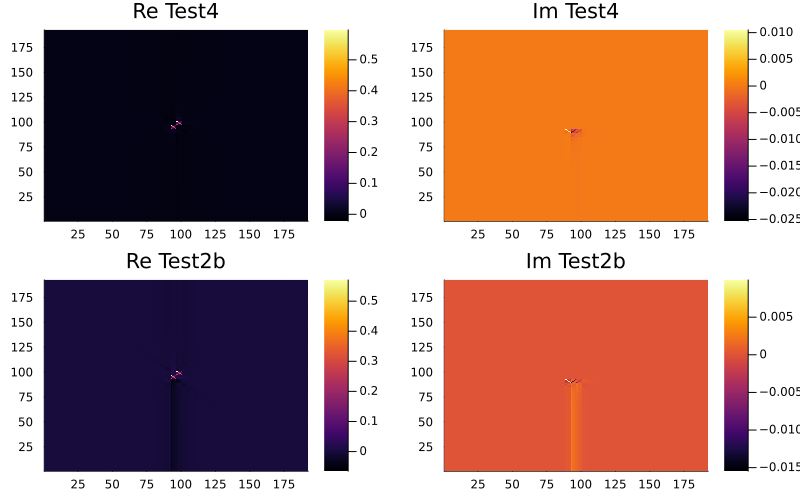

In [72]:
println("Maximum Imaginary Entry of 3: ", maximum(abs.(imag(Γs_ladder3))), " // 4: ", maximum(abs.(imag(Γs_ladder4))))
p1 = heatmap(real(Γs_ladder4), title="Re Test4")
p2 = heatmap(imag(Γs_ladder4), title="Im Test4")
p3 = heatmap(real(Γs_ladder2b), title="Re Test2b")
p4 = heatmap(imag(Γs_ladder2b), title="Im Test2b")

plot(p1, p2, p3, p4, size=(800,500))

In [73]:
using LinearAlgebra
#@time ev3,vv3 = eigen(Γs_ladder3)#Γs_ladder3)
#@time ev4,vv4 = eigen(Γs_ladder4)#Γs_ladder4)
#@time ev4_2,vv4_2 = eigen(real.(Γs_ladder4)); #Γs_ladder4));

In [74]:
#ii1_2r = sortperm(real.(ev1_2))
ii3r = sortperm(real.(ev3))
ii4r = sortperm(real.(ev4))
ii4_2r = sortperm(real.(ev4_2))
p1 = plot(real(ev3)[ii3r], markershape=:auto, label="Real Test1",markersize=12)
plot!(real(ev4)[ii4r], markershape=:auto, label="Real Test4",markersize=14)
plot!(real(ev4_2)[ii4_2r], markershape=:auto, label="Real Test4_2")

p2 = plot(real(ev3)[ii3r] .- real(ev4)[ii4r], markershape=:auto, label=" Real Test3 -  Test4")
plot!( real(ev4)[ii4r] .- real(ev4_2)[ii4_2r], markershape=:auto, label=" Real Test4 -  Test4b")
plot(p1, p2, size=(800,400))

LoadError: UndefVarError: `ev3` not defined

In [75]:
ii1i = sortperm(imag.(ev1))
#ii1_2i = sortperm(imag.(ev1_2))
ii3i = sortperm(imag.(ev3))
ii4i = sortperm(imag.(ev4))
ii4_2i = sortperm(imag.(ev4_2))
plot(imag(ev1)[ii1i], markershape=:auto, label="Imag Test1",markersize=12)
#plot!(imag(ev1_2)[ii1_2i], markershape=:auto, label="Real Test1_2",markersize=12)
#plot!(imag(ev3)[ii3i], markershape=:auto, label="Imag Test3", markersize=8)
plot!(imag(ev4)[ii4i], markershape=:auto, label="Imag Test4", markersize=14)
plot!(imag(ev4_2)[ii4_2i], markershape=:auto, label="Imag Test4_2")

LoadError: UndefVarError: `ev1` not defined

In [76]:
using Arpack

@time λ3, ϕ3, nconv2, niter2, nmult2, resid2 = eigs(Γs_ladder3; nev=1, which=:LR, tol=1e-18);
@time λ3b, ϕ3b, nconv2, niter2, nmult2, resid2 = eigs(real(Γs_ladder3); nev=1, which=:LR, tol=1e-18);#6392.743357290174 + 415.3295064808915im
@time λ4, ϕ4, nconv3, niter3, nmult3, resid3 = eigs(Γs_ladder4; nev=1, which=:LR, tol=1e-18);
@time λ4b, ϕ4b, nconv3, niter3, nmult3, resid3 = eigs(real(Γs_ladder4); nev=1, which=:LR, tol=1e-18);
println("Largest (real-part) eigenvalue 3/3b\n$λ3\n$λ3b\n\n4/4b\n$λ4\n$λ4b")

  0.033827 seconds (226 allocations: 104.469 KiB)
  0.000668 seconds (236 allocations: 360.141 KiB)
  0.000705 seconds (217 allocations: 103.906 KiB)
  0.000495 seconds (233 allocations: 359.953 KiB)
Largest (real-part) eigenvalue 3/3b
ComplexF64[0.6734447462199596 - 0.00015517653954189763im]
ComplexF64[0.6734446464208159 + 0.0im]

4/4b
ComplexF64[0.7352835081797506 - 0.0005227353645374851im]
ComplexF64[0.7352797305739878 + 0.0im]


In [77]:
using Arpack

@time λ3, ϕ3, nconv2, niter2, nmult2, resid2 = eigs(Γs_ladder3; nev=1, which=:LR, tol=1e-18);
@time λ3b, ϕ3b, nconv2, niter2, nmult2, resid2 = eigs(real(Γs_ladder3); nev=1, which=:LR, tol=1e-18);#6392.743357290174 + 415.3295064808915im
@time λ4, ϕ4, nconv3, niter3, nmult3, resid3 = eigs(Γs_ladder4; nev=1, which=:LR, tol=1e-18);
@time λ4b, ϕ4b, nconv3, niter3, nmult3, resid3 = eigs(real(Γs_ladder4); nev=1, which=:LR, tol=1e-18);

  0.001148 seconds (217 allocations: 103.906 KiB)
  0.000698 seconds (233 allocations: 359.953 KiB)
  0.000804 seconds (217 allocations: 103.906 KiB)
  0.000479 seconds (233 allocations: 359.953 KiB)


In [78]:
println("Largest (real-part) eigenvalue 3/3b\n$λ3\n$λ3b\n\n4/4b\n$λ4\n$λ4b")

Largest (real-part) eigenvalue 3/3b
ComplexF64[0.6734447462199593 - 0.00015517653954184255im]
ComplexF64[0.6734446464208158 + 0.0im]

4/4b
ComplexF64[0.7352835081797502 - 0.000522735364537522im]
ComplexF64[0.735279730573985 + 0.0im]


In [79]:
@time λ3, ϕ3, nconv2, niter2, nmult2, resid2 = eigs(Γs_ladder3; nev=1, which=:SR, tol=1e-18);
@time λ3b, ϕ3b, nconv2, niter2, nmult2, resid2 = eigs(real(Γs_ladder3); nev=1, which=:LR, tol=1e-18);#6392.743357290174 + 415.3295064808915im
@time λ4, ϕ4, nconv3, niter3, nmult3, resid3 = eigs(Γs_ladder4; nev=1, which=:SR, tol=1e-18);
@time λ4b, ϕ4b, nconv3, niter3, nmult3, resid3 = eigs(real(Γs_ladder4); nev=1, which=:LR, tol=1e-18);
println("Smallest (real-part) eigenvalue 3/3b\n$λ3\n$λ3b\n\n4/4b\n$λ4\n$λ4b")

  0.121776 seconds (5.74 k allocations: 345.156 KiB, 99.02% compilation time)
  0.000546 seconds (233 allocations: 359.953 KiB)
  0.001019 seconds (297 allocations: 106.406 KiB)
  0.000498 seconds (233 allocations: 359.953 KiB)
Smallest (real-part) eigenvalue 3/3b
ComplexF64[-0.2206107886933248 + 0.00012116596844984215im]
ComplexF64[0.6734446464208169 + 0.0im]

4/4b
ComplexF64[-0.22062707093557454 + 0.00012842718022293322im]
ComplexF64[0.7352797305739859 + 0.0im]


In [38]:
println("matrix 2 with residual norm of ", norm(resid2), " after $niter2 iterations and $nmult2 multiplications")
println("matrix 3 with residual norm of ", norm(resid3), " after $niter3 iterations and $nmult3 multiplications")

matrix 2 with residual norm of 0.007625380143938361 after 1 iterations and 20 multiplications
matrix 3 with residual norm of 0.0038411197474178174 after 1 iterations and 20 multiplications


In [39]:
using LinearAlgebra
#@time ev2,vv2 = eigen(Γs_ladder2)
@time ev3,vv3 = eigen(Γs_ladder5)

LoadError: UndefVarError: `Γs_ladder5` not defined

In [40]:
ii = sortperm(real(ev2))
vv2[ii,ii]

LoadError: UndefVarError: `ev2` not defined

In [41]:
ii = sortperm(real(ev3))
vv3[ii,ii]

LoadError: UndefVarError: `ev3` not defined

In [42]:
r_ev = sort(real(ev2))
println("largest eigen value $(r_ev[end]), smallest eigen value $(r_ev[1])")
plot(sort(real(ev2)),markershape=:auto)

LoadError: UndefVarError: `ev2` not defined

In [43]:
plot(sort(imag(ev2)),markershape=:auto)

LoadError: UndefVarError: `ev2` not defined

In [106]:
plot(sort(abs.(ev2)),markershape=:auto)

LoadError: UndefVarError: `ev2` not defined

### Internal Test

In [3]:
cfg = "/home/julisn/Codes/lDGA_pp_test/tp1_50_s1_U2.0_b5.0_mu1.0/config.toml"
empty!(ARGS)
push!(ARGS, cfg)
include("/home/julisn/Codes/LadderDGA.jl/scripts/linEliashberg.jl")

activating: /home/julisn/Codes/LadderDGA.jl/scripts/..


  Activating project at `~/Codes/LadderDGA.jl`
[ Info: Precompiling LadderDGA [78e40beb-bf89-4c0e-9d2b-bee278912f2b]


[ Info: Reading Inputs...
[ Info: Setting up calculation for kGrid 2Dsc-0.25-0.2-0.1 of size 2
WARNING!!! k-grid sampling must contain zero-vector in order for convolutions to work!
DBG: NOT using diagonal terms in λ₀
┌ Info: Inputs Read. Starting Computation.
│ Local susceptibilities with ranges are:
│ χLoc_m(1:101) = 0.4074, χLoc_d(1:101) = 0.0926
└ sum χupup check (plain ?≈? tail sub ?≈? imp_dens ?≈? n/2 (1-n/2)): 0.24838674915875686 ?=? 0.25000344825755627 ?≈? 0.25000344825755627 ≟ 0.24999268986197437"
output file location: /home/julisn/Codes/lDGA_pp_test/tp1_50_s1_U2.0_b5.0_mu1.0/test_res_ldga_LinEliashberg_NK2_Nw100.jld2
[ Info: m channel: |∑χ(q=0,ω≠0)| = 0.12180408872 ≟ 0
[ Info: d channel: |∑χ(q=0,ω≠0)| = 0.237050026898 ≟ 0
DBG: NOT using diagonal terms in λ₀
DBG: λm=-1.5651, λd=55.4319, μ=0.6807, n=1.0054 // EPot_p1: 0.1113 , p2: 0.1113 :: 0.25 // 0.25
DBG: λm=-1.507, λd=23.0244, μ=0.6151, n=1.0054 // EPot_p1: 0.159 , p2: 0.159 :: 0.25 // 0.25
DBG: λm=-1.515, λd=25.5475, μ=0.6

(1.0392104893897138 - 0.00023470441091436728im, 1.0392104893897125 - 0.0002347044109141834im, -0.43899118509846324 - 3.686081319234312e-5im, -0.438991185098463 - 3.6860813192433546e-5im)

In [4]:
real.(λ_list)

([0.6734447462199593], [0.6734447462199579], [-0.22062707093557446], [-0.22062707093557443])

In [5]:
real.(λ_m_list)

([0.5664265442090066], [0.5664265442090075], [-0.20445835001373663], [-0.20445835001373652])

In [6]:
real.(λ_dm_list)

([0.5411003512620972], [0.5411003512620972], [-0.2024200537052146], [-0.2024200537052137])

In [7]:
real.(λ_dm_sc_gLoc_list)

([0.5524906750939378], [0.552490675093939], [-0.20148930140440674], [-0.2014893014044069])

In [5]:
real.(λ_dm_sc_list)

([1.0392104893897138], [1.0392104893897125], [-0.43899118509846324], [-0.438991185098463])

In [9]:
res_dm_sc.G_ladder

3×401 OffsetArray(::Matrix{ComplexF64}, 1:3, -200:200) with eltype ComplexF64 with indices 1:3×-200:200:
  3.58712e-6+0.00398878im  …   3.55143e-6-0.00396889im
  1.31332e-5+0.00398874im      1.30025e-5-0.00396885im
 -2.82322e-5+0.00398858im     -2.79513e-5-0.00396869im